In [4]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from os import listdir
from os.path import isfile, join

In [5]:
def generate_mouse_dataframe(mouse_data_path, mouse, trace_analysis_start, trace_analysis_end, delay, set_length, days_list):
    df_temp = pd.DataFrame(columns=['mouse', 'day', 'trial_number', 'trial_type', 'lick_data', 'lick_times', 'go_nogo', 'outcome', 'correct', 'hit', 'miss', 'set'])

    for day in days_list:
        day_files = [f for f in sorted(listdir(mouse_data_path)) if isfile(join(mouse_data_path, f)) and mouse in f and f"day{day}" in f]

        for file_name in day_files:
            file_path = join(mouse_data_path, file_name)
            data = pd.read_csv(file_path, header=None, names=['time', 'odour_a', 'odour_b', 'odour_c', 'licks', 'water'])

        # make a generic odour trace 
        data['odour'] = data.odour_a + data.odour_b + data.odour_c

        #find each odour
        key = []
        trial_number = []
        licks = []
        licks_times = []
        go_nogo = []
        outcome = []
        trial_count = 0
        odour_1 = []
        odour_2 = []

        odour_2_licks = []
        resp_wind_licks = []
        odour_2_resp_wind_licks = []

        #specfify time window to take lick datas from for each trial
        post_O2 = 7000


        for x in np.where(data.odour.diff() >2)[0][0:]: #(to detect first trial)

            #identify of the odour

            #if odour a
            if data.odour_a[x] > 2:
                #if preceded by odour b
                if x > (delay+1000) and data.odour_b[x-(delay+500)] > 2:
                    key.append('b->a')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('no_go')
                    odour_2.append('a')
                    odour_1.append('b')


                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('correct_rejection')
                    else:
                        outcome.append('false_positive')


                        #if preceded by odour c
                if x > (delay+1000) and data.odour_c[x-(delay+500)] >2:
                    key.append('c->a')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('go')
                    odour_2.append('a')
                    odour_1.append('c')

                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('miss')
                    else:
                        outcome.append('hit')

                        #if odour b
            if data.odour_b[x] >2:
                #if preceded by odour a
                if x > (delay+1000) and data.odour_a[x-(delay+500)] >2:
                    key.append('a->b')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('go')
                    odour_1.append('a')
                    odour_2.append('b')

                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('miss')
                    else:
                        outcome.append('hit')

                #if preceded by odour c
                if x > (delay+1000) and data.odour_c[x-(delay+500)] >2:
                    key.append('c->b')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('no_go')
                    odour_1.append('c')
                    odour_2.append('b')

                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('correct_rejection')
                    else:
                        outcome.append('false_positive')

            #if odour c
            if data.odour_c[x] >2:
                #if preceded by odour b
                if x > (delay+1000) and data.odour_b[x-(delay+500)] >2:
                    key.append('b->c')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('go')
                    odour_1.append('b')
                    odour_2.append('c')

                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('miss')
                    else:
                        outcome.append('hit')

                #if preceded by odour a
                if x > (delay+1000) and data.odour_a[x-(delay+500)] >2:
                    key.append('a->c')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('no_go')
                    odour_1.append('a')
                    odour_2.append('b')

                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('correct_rejection')
                    else:
                        outcome.append('false_positive')


        data_temp = pd.DataFrame()
        data_temp['mouse'] = np.repeat(mouse, len(key))
        data_temp['day'] = np.repeat(day, len(key))
        data_temp['trial_number'] = trial_number
        data_temp['trial_type'] = key
        data_temp['lick_data'] = licks
        data_temp['lick_times'] = licks_times
        data_temp['go_nogo'] = go_nogo
        data_temp['outcome'] = outcome
        data_temp['correct'] = np.where(data_temp.outcome == 'hit', 1.0, 0.0) + np.where(data_temp.outcome == 'correct_rejection', 1.0, 0.0)
        data_temp['hit'] = np.where(data_temp.outcome == 'hit', 1.0, 0.0)
        data_temp['correct_rejection'] = np.where(data_temp.outcome == 'correct_rejection', 1.0, 0.0)
        data_temp['miss'] = np.where(data_temp.outcome == 'miss', 1.0, 0.0)
        data_temp['false_positive'] = np.where(data_temp.outcome == 'false_positive', 1.0, 0.0)
        data_temp['odour_1'] = odour_1
        data_temp['odour_2'] = odour_2

        #data_temp.drop([0, 1, 2, 3, 4], inplace=True)
        # if first trial not recognised, remove other trials from first block
        data_temp.index = pd.RangeIndex(len(data_temp.index))
        # reset index

        block_length = 6

        odour_block = np.repeat(np.arange(len(data_temp)//block_length), block_length)

        # if there is not a number of trials divisible by 6
        if len(odour_block) != len(data_temp):
            # make a list of the last set number, the length required
            temp_block = np.ones(len(data_temp) - len(odour_block)) * -1
            odour_block = odour_block.tolist() + temp_block.tolist()

            data_temp['block'] = odour_block

            index_extra_trial = data_temp[ data_temp['block'] == -1 ].index
            data_temp.drop(index_extra_trial , inplace=True)
            #removes final trials in unfinished block
        elif len(odour_block) == len(data_temp):
            data_temp['block'] = odour_block

        odour_set = np.repeat(np.arange(len(data_temp)//set_length), set_length)

        # if there is not a number of trials divisible by 6
        if len(odour_set) != len(data_temp):
            # make a list of the last set number, the length required
            temp = np.ones(len(data_temp) - len(odour_set)) * odour_set[-1]
            odour_set = odour_set.tolist() + temp.tolist()
        data_temp['set'] = odour_set

        df_temp = pd.concat([df_temp, data_temp])

    return df_temp


# Dataframe generating zone

In [6]:
behaviour_directory = '/Volumes/Lab_drive/Maxwell_data/Behaviour'
mouse_ids = ['maxwell_452', 'maxwell_453', 'maxwell_454']
days_to_process = np.arange(13,26)

data_frames = {}  # Initialize an empty dictionary to store the DataFrames

# Loop through each mouse ID and process the data
for mouse_id in mouse_ids:
    df_mouse = generate_mouse_dataframe(behaviour_directory, mouse_id, 1500, 2450, 5000, 10, days_to_process)
    data_frames[mouse_id] = df_mouse  # Store the DataFrame in the dictionary keyed by mouse ID

# Now you can access each mouse's DataFrame from the dictionary
df_maxwell_452 = data_frames['maxwell_452']
df_maxwell_453 = data_frames['maxwell_453']
df_maxwell_454 = data_frames['maxwell_454']

In [22]:
# Combine DataFrames from all mice into a single DataFrame
df_all_mice = pd.concat([df_maxwell_452, df_maxwell_453, df_maxwell_454])

In [23]:
df_maxwell_453

,mouse,day,trial_number,trial_type,lick_data,lick_times,go_nogo,outcome,correct,hit,miss,set,correct_rejection,false_positive,odour_1,odour_2,block
0,maxwell_453,13,0,a->b,"[-0.017111, -0.015818, -0.017111, -0.015818, -...","[11620, 11621, 11622, 11623, 11624, 11625, 116...",go,miss,0.0,0.0,1.0,0.0,0.0,0.0,a,b,0.0
1,maxwell_453,13,1,b->c,"[-0.017111, -0.014525, -0.018403, -0.017111, -...",[],go,miss,0.0,0.0,1.0,0.0,0.0,0.0,b,c,0.0
2,maxwell_453,13,2,a->c,"[-0.014525, -0.017111, -0.017111, -0.015818, -...",[],no_go,correct_rejection,1.0,0.0,0.0,0.0,1.0,0.0,a,b,0.0
3,maxwell_453,13,3,c->b,"[4.943925, 4.943925, 4.942632, 4.945217, 4.943...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",no_go,correct_rejection,1.0,0.0,0.0,0.0,1.0,0.0,c,b,0.0
4,maxwell_453,13,4,b->a,"[-0.015818, -0.015818, -0.017111, -0.017111, -...",[],no_go,correct_rejection,1.0,0.0,0.0,0.0,1.0,0.0,b,a,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,maxwell_453,23,91,b->a,"[-0.026159, -0.022281, -0.027451, -0.026159, -...",[],no_go,correct_rejection,1.0,0.0,0.0,8.0,1.0,0.0,b,a,15.0
92,maxwell_453,23,92,b->c,"[-0.026159, -0.024866, -0.020988, -0.027451, -...","[4054, 4055, 4056, 4057, 4058, 4059, 4060, 406...",go,hit,1.0,1.0,0.0,8.0,0.0,0.0,b,c,15.0
93,maxwell_453,23,93,c->b,"[-0.023574, -0.028744, -0.027451, -0.024866, -...",[],no_go,correct_rejection,1.0,0.0,0.0,8.0,1.0,0.0,c,b,15.0
94,maxwell_453,23,94,a->b,"[-0.028744, -0.023574, -0.020988, -0.026159, -...","[11585, 11586, 11587, 11588, 11589, 11590, 115...",go,miss,0.0,0.0,1.0,8.0,0.0,0.0,a,b,15.0


# Overall learning trajectory

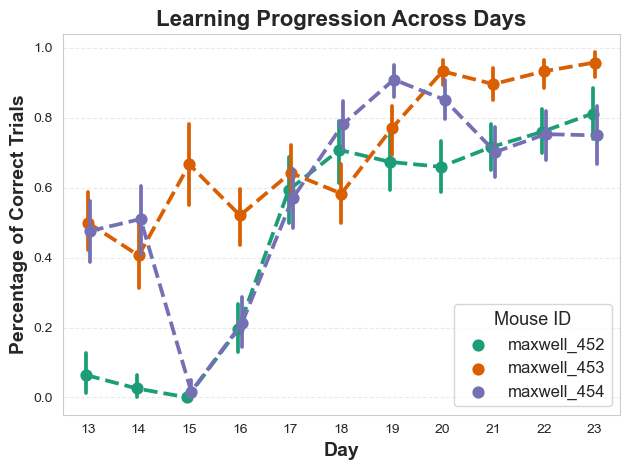

In [24]:
# Create a point plot to show the progression of correct trials for each mouse across days
sns.pointplot(data=df_all_mice, x='day', y='correct', hue='mouse', dodge=True, markers='o', linestyles='--')

# Enhance plot aesthetics with better titles and labels
plt.title('Learning Progression Across Days', fontsize=16, fontweight='bold')
plt.ylabel('Percentage of Correct Trials', fontsize=14, fontweight='bold')
plt.xlabel('Day', fontsize=14, fontweight='bold')
plt.legend(title='Mouse ID', title_fontsize='13', fontsize='12')

# Adjust additional plot settings for readability
plt.grid(axis='y', linestyle='--', alpha=0.4)  # Add horizontal grid lines for better readability
plt.tight_layout()  # Adjust layout to make sure everything fits without overlap

# Display the plot
plt.show()

In [25]:
def plot_behavior_metrics(task_data):
    # Check if 'mouse' and 'day' columns exist
    if 'mouse' not in task_data.columns or 'day' not in task_data.columns:
        raise ValueError("DataFrame must contain 'mouse' and 'day' columns.")

    # Ensure only numeric columns are included for mean calculation, plus 'mouse' and 'day' for grouping
    numeric_cols = task_data.select_dtypes(include=['number']).columns.tolist()
    groupby_cols = ['mouse', 'day']
    cols_to_use = list(set(numeric_cols + groupby_cols))
    mean_data = task_data[cols_to_use].groupby(groupby_cols).mean().reset_index()

    sns.set_palette("Dark2")
    plt.figure(figsize=(18, 6))

    # Plot Correct Rate
    plt.subplot(1, 3, 1)
    sns.pointplot(data=mean_data, x='day', y='correct', hue='mouse')
    plt.title('Correct Rate Over Training Days')
    plt.axhline(y=0.5, c='k', linestyle='--')
    plt.axhline(y=0.7, c='0.5', linestyle='--')
    plt.axhline(y=0.8, c='0.5', linestyle='--')
    plt.ylim(0, 1)
    plt.ylabel('Correct Rate (%)')
    plt.xlabel('Training Day')
    plt.yticks([0, 0.25, 0.5, 0.75, 1], [0, 25, 50, 75, 100])

    # Plot Hit Rate
    plt.subplot(1, 3, 2)
    sns.pointplot(data=mean_data, x='day', y='hit', hue='mouse')
    plt.title('Hit Rate Over Training Days')
    plt.axhline(y=0.5, c='k', linestyle='--')
    plt.axhline(y=0.7, c='0.5', linestyle='--')
    plt.axhline(y=0.8, c='0.5', linestyle='--')
    plt.ylim(0, 1)
    plt.ylabel('Hit Rate (%)')
    plt.xlabel('Training Day')
    plt.yticks([0, 0.25, 0.5, 0.75, 1], [0, 25, 50, 75, 100])
    
    # Plot Correct Rejection Rate
    plt.subplot(1, 3, 3)
    sns.pointplot(data=mean_data, x='day', y='correct_rejection', hue='mouse')
    plt.title('Correct Rejection Rate Over Training Days')
    plt.axhline(y=0.5, c='k', linestyle='--')
    plt.axhline(y=0.7, c='0.5', linestyle='--')
    plt.axhline(y=0.8, c='0.5', linestyle='--')
    plt.ylim(0, 1)
    plt.ylabel('Correct Rejection Rate (%)')
    plt.xlabel('Training Day')
    plt.yticks([0, 0.25, 0.5, 0.75, 1], [0, 25, 50, 75, 100])
    
    sns.despine()
    plt.tight_layout()
    plt.show()


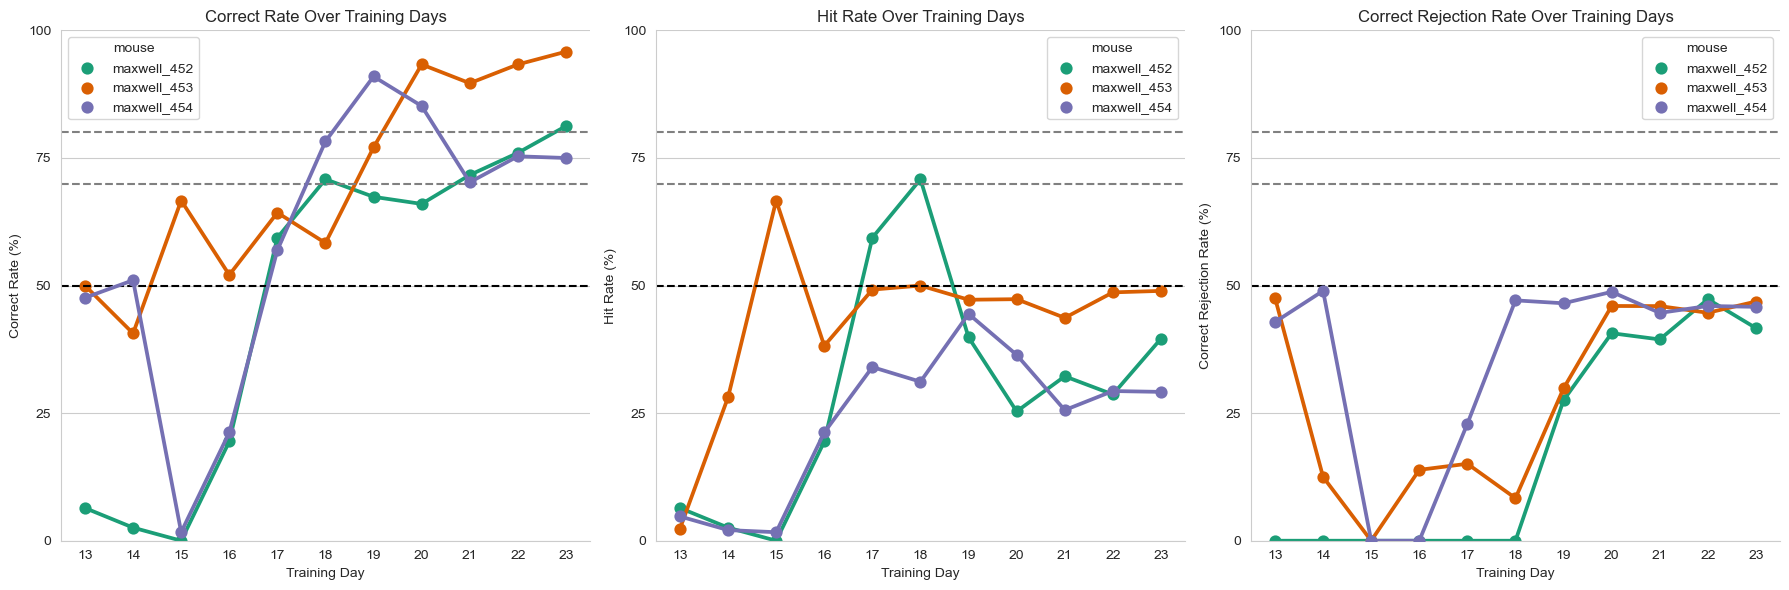

In [26]:
plot_behavior_metrics(df_all_mice)

# Raw licking roster plots 
***code credit: David Orme***

In [27]:
def plot_lick_raster(task_data, day, delay=5000, offset=2):
    """
    Plots lick times on each trial (rows) separated by go trials (bottom) and no-go trials (top) for a specific day.

    Parameters:
    - task_data: DataFrame containing the task data for a specific mouse.
    - day: Integer, the day of session to plot.
    - delay: Integer, delay time in milliseconds.
    - offset: Integer, sets spacing between trial rasters.
    """

    temp_data = task_data[task_data.day == day]
    if not temp_data.empty:
        mouse_id = temp_data['mouse'].iloc[0]  # Assuming all entries have the same mouse ID
    else:
        mouse_id = "Unknown Mouse"  # Fallback in case the DataFrame is empty

    plot_height = len(temp_data) * offset

    lick_times_go = temp_data[temp_data.go_nogo == 'go']['lick_times']
    lick_times_nogo = temp_data[temp_data.go_nogo == 'no_go']['lick_times']
    lick_times_go_nogo = pd.concat([lick_times_go, lick_times_nogo])

    plt.figure(dpi=100, figsize=(10, 6))
    plt.eventplot(lick_times_go_nogo, linewidths=1, lineoffsets=2, colors='g')
    plt.xlim(0, delay + 10000)

    # Adding informative labels and title with dynamic mouse ID
    plt.xlabel('Time (s)')
    plt.ylabel('Trial Number')
    plt.title(f'Mouse {mouse_id} Lick Times for Day {day}')

    # Adding color-coded regions to the plot with labels outside the plot
    water_template = np.zeros(delay + 10000)
    water_template[delay + 6500:delay + 6650] = plot_height
    plt.fill_between(range(len(water_template)), water_template, color='skyblue', step='pre', label='Water Reward Window')

    go_nogo_template = np.zeros(delay + 10000)
    go_nogo_template[delay + 5500:delay + 6450] = plot_height
    plt.fill_between(range(len(go_nogo_template)), go_nogo_template, color='yellow', step='pre', label='Go/No-Go Decision Window')

    odour_template = np.zeros(delay + 10000)
    odour_template[3000:4000] = plot_height
    odour_template[delay + 4000:delay + 5000] = plot_height
    plt.fill_between(range(len(odour_template)), odour_template, color='0.8', step='pre', label='Odour Presentation')

    plt.yticks([0, len(lick_times_go) * offset, len(temp_data) * offset], ['0', f'Go Trials: {len(lick_times_go)}', f'Total Trials: {len(temp_data)}'])
    plt.xticks([2000, 4000, 6000, 8000, 10000, 12000, 14000], ['2', '4', '6', '8', '10', '12', '14'])
    plt.axhline(y=len(lick_times_go) * offset, c='k', linestyle='--', label='Go/No-Go Boundary')

    # Placing the legend outside
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.show()


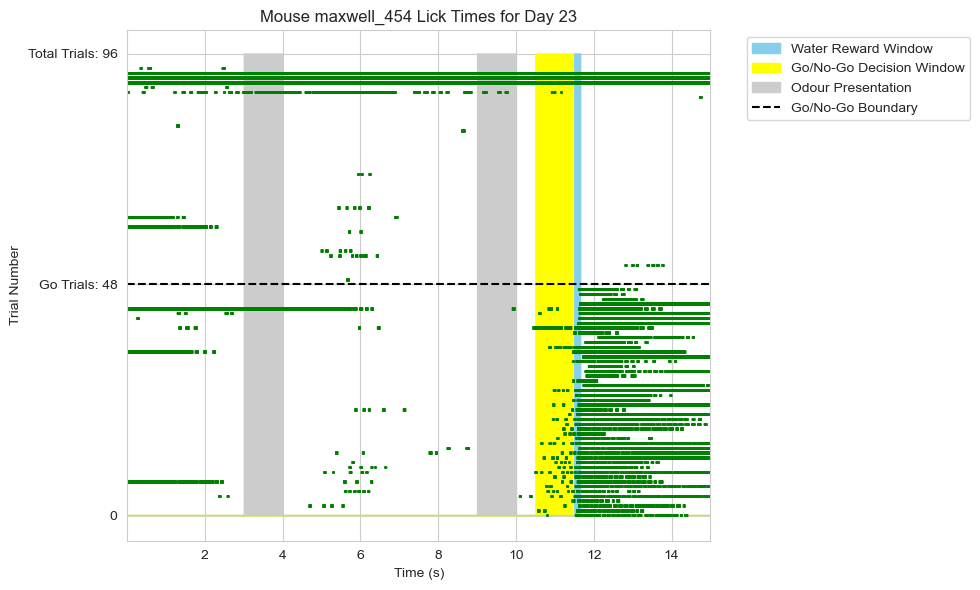

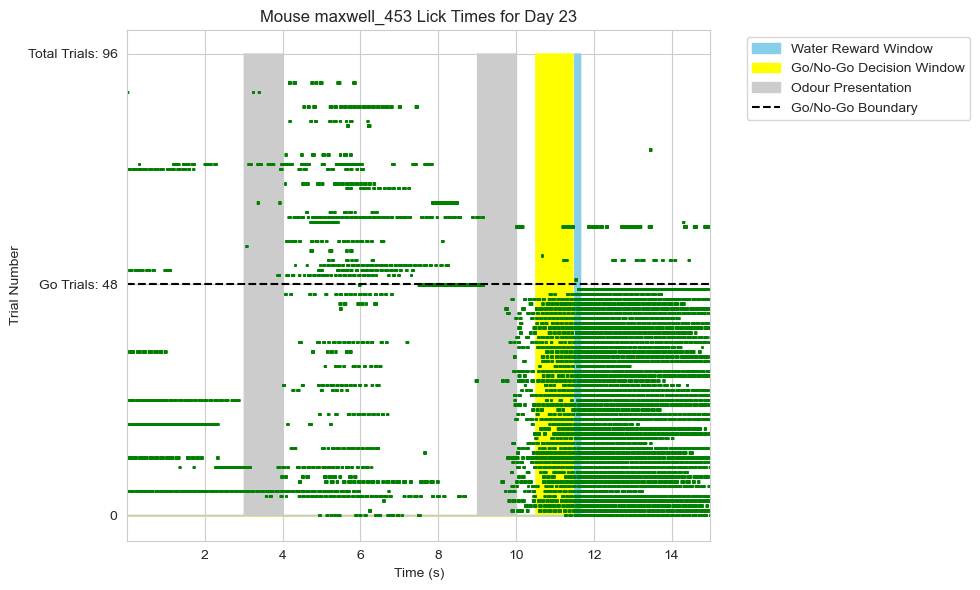

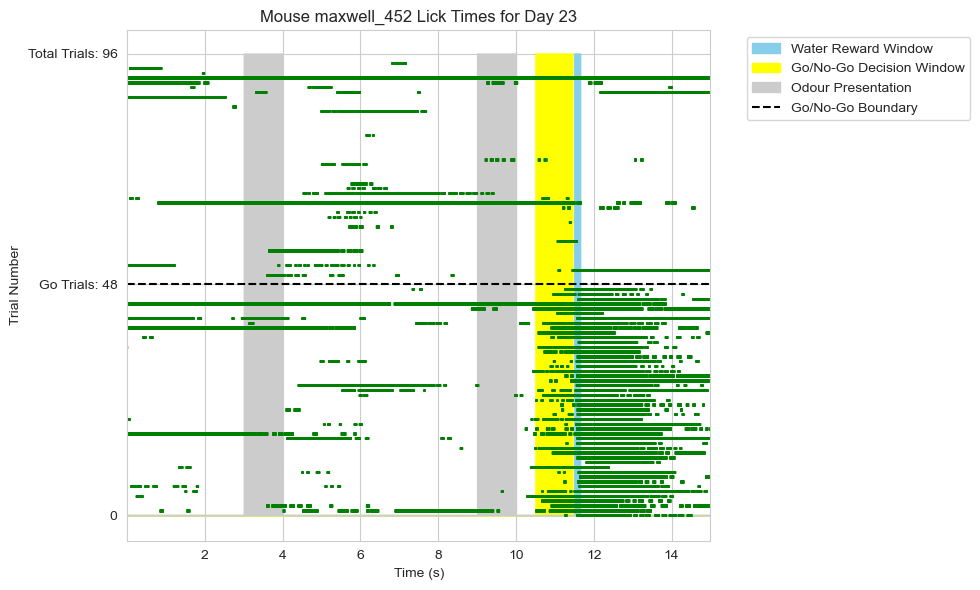

In [28]:
plot_lick_raster(df_maxwell_454, day=23)
plot_lick_raster(df_maxwell_453, day=23)
plot_lick_raster(df_maxwell_452, day=23)


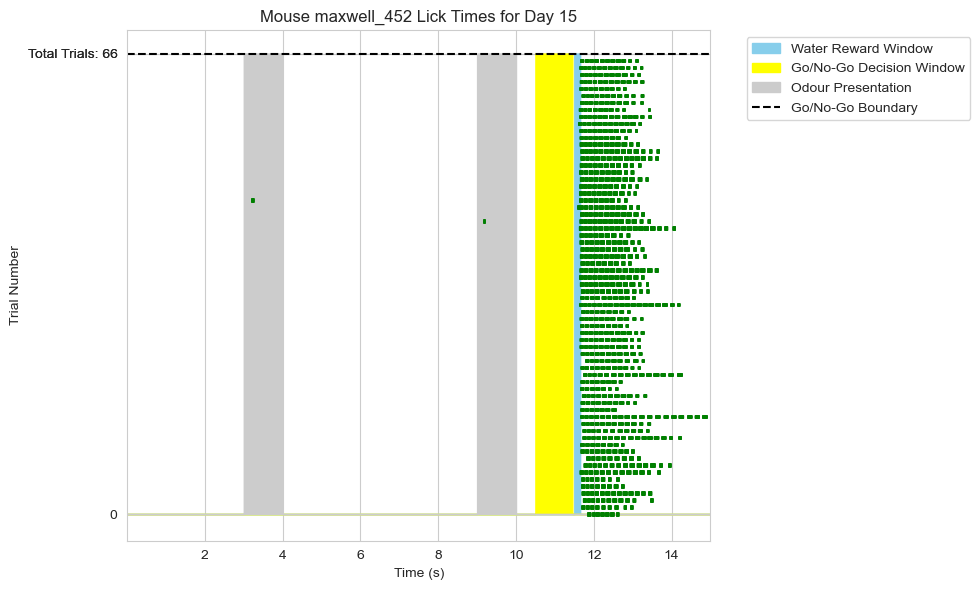

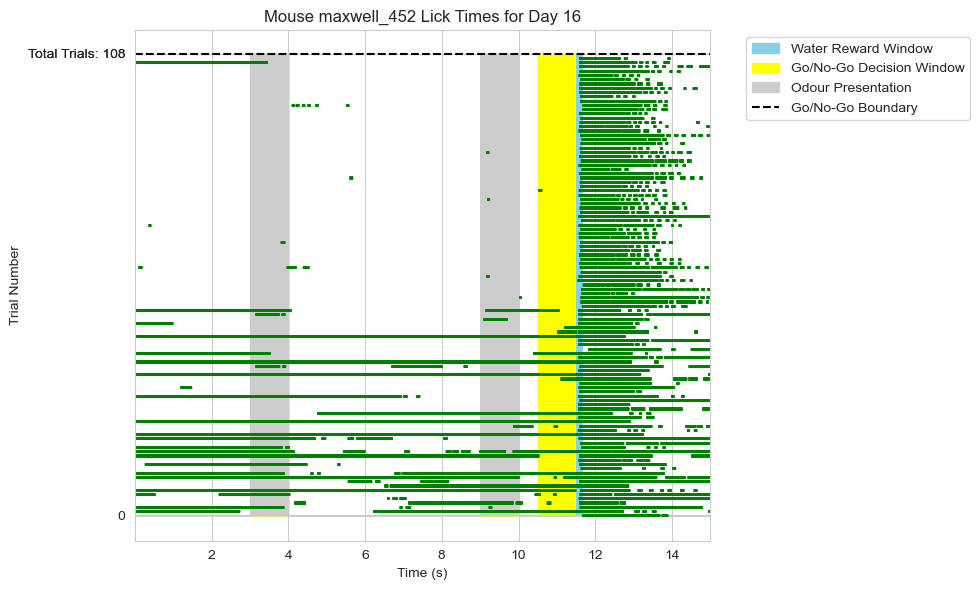

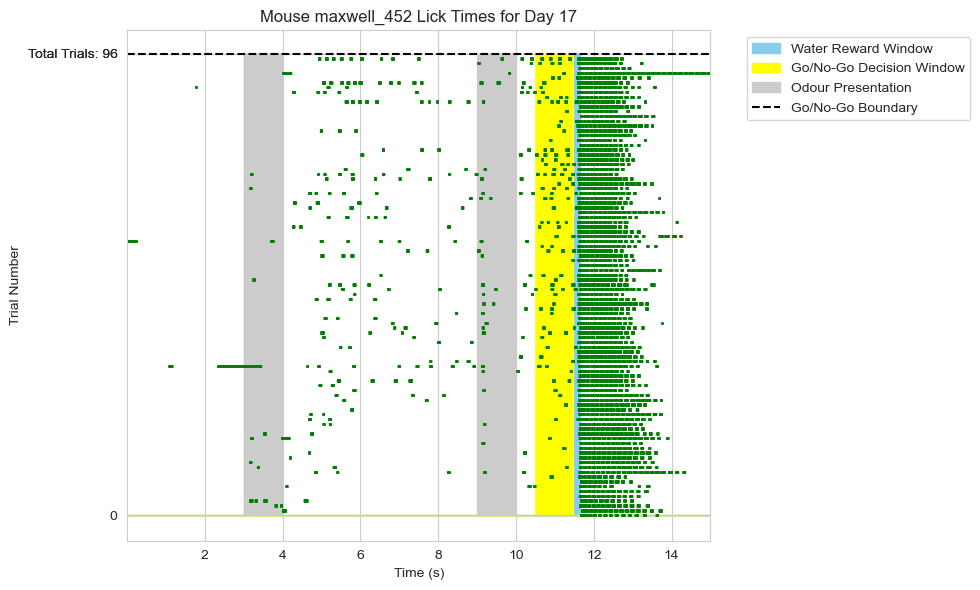

In [68]:
plot_lick_raster(df_maxwell_452, day=15)
plot_lick_raster(df_maxwell_452, day=16)
plot_lick_raster(df_maxwell_452, day=17)

# Inter-session licking dynamics


In [12]:
def plot_licks_trend_with_linear_fit(df, mouse_id, days_to_plot):
    """
    Plots the rolling mean of correct trials (licks) over time for specified days,
    including a linear fit to illustrate the overall trend for each day.
    
    Parameters:
    - df: DataFrame containing the data for all mice, including 'day' and 'correct' columns.
    - mouse_id: String specifying the mouse ID to analyze.
    - days_to_plot: List of integers specifying the days to include in the plot.
    """
    # Filter data for the specific mouse
    df_mouse = df[df['mouse'] == mouse_id]
    
    subplot_height = 2
    fig_height = subplot_height * len(days_to_plot)

    fig, axs = plt.subplots(len(days_to_plot), 1, figsize=(10, fig_height), sharex=False)  # One subplot for each day
    if len(days_to_plot) == 1:  # Make sure axs is iterable
        axs = [axs]

    for idx, day in enumerate(days_to_plot):
        ax = axs[idx]
        data_for_day = df_mouse[df_mouse['day'] == day]['correct'].reset_index(drop=True)
        rolling_mean = data_for_day.rolling(4).mean()

        # Plot rolling mean
        ax.plot(rolling_mean, label=f'Day {day}', color='teal', alpha=0.6)

        # Linear fit
        x = np.arange(len(rolling_mean))
        y = rolling_mean.values
        mask = ~np.isnan(y)  # Remove NaN values for linear regression
        slope, intercept, r_value, p_value, std_err = linregress(x[mask], y[mask])
        ax.plot(x, intercept + slope*x, 'r', label=f'Linear Fit: slope={slope:.5f}', alpha=0.8)

        # Enhance subplot aesthetics
        ax.set_title(f'Day {day}', fontsize=14, fontweight='bold')
        ax.set_ylabel('Rolling Mean Correct', fontsize=10)
        ax.legend(loc='upper left', bbox_to_anchor=(1,1))

    # Global adjustments
    axs[-1].set_xlabel('Trial Number', fontsize=12)  # Only set xlabel on the last subplot
    plt.suptitle(f"Mouse {mouse_id}'s Licking Behavior Over Days", fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    # Display the plot
    plt.show()

ValueError: Inputs must not be empty.

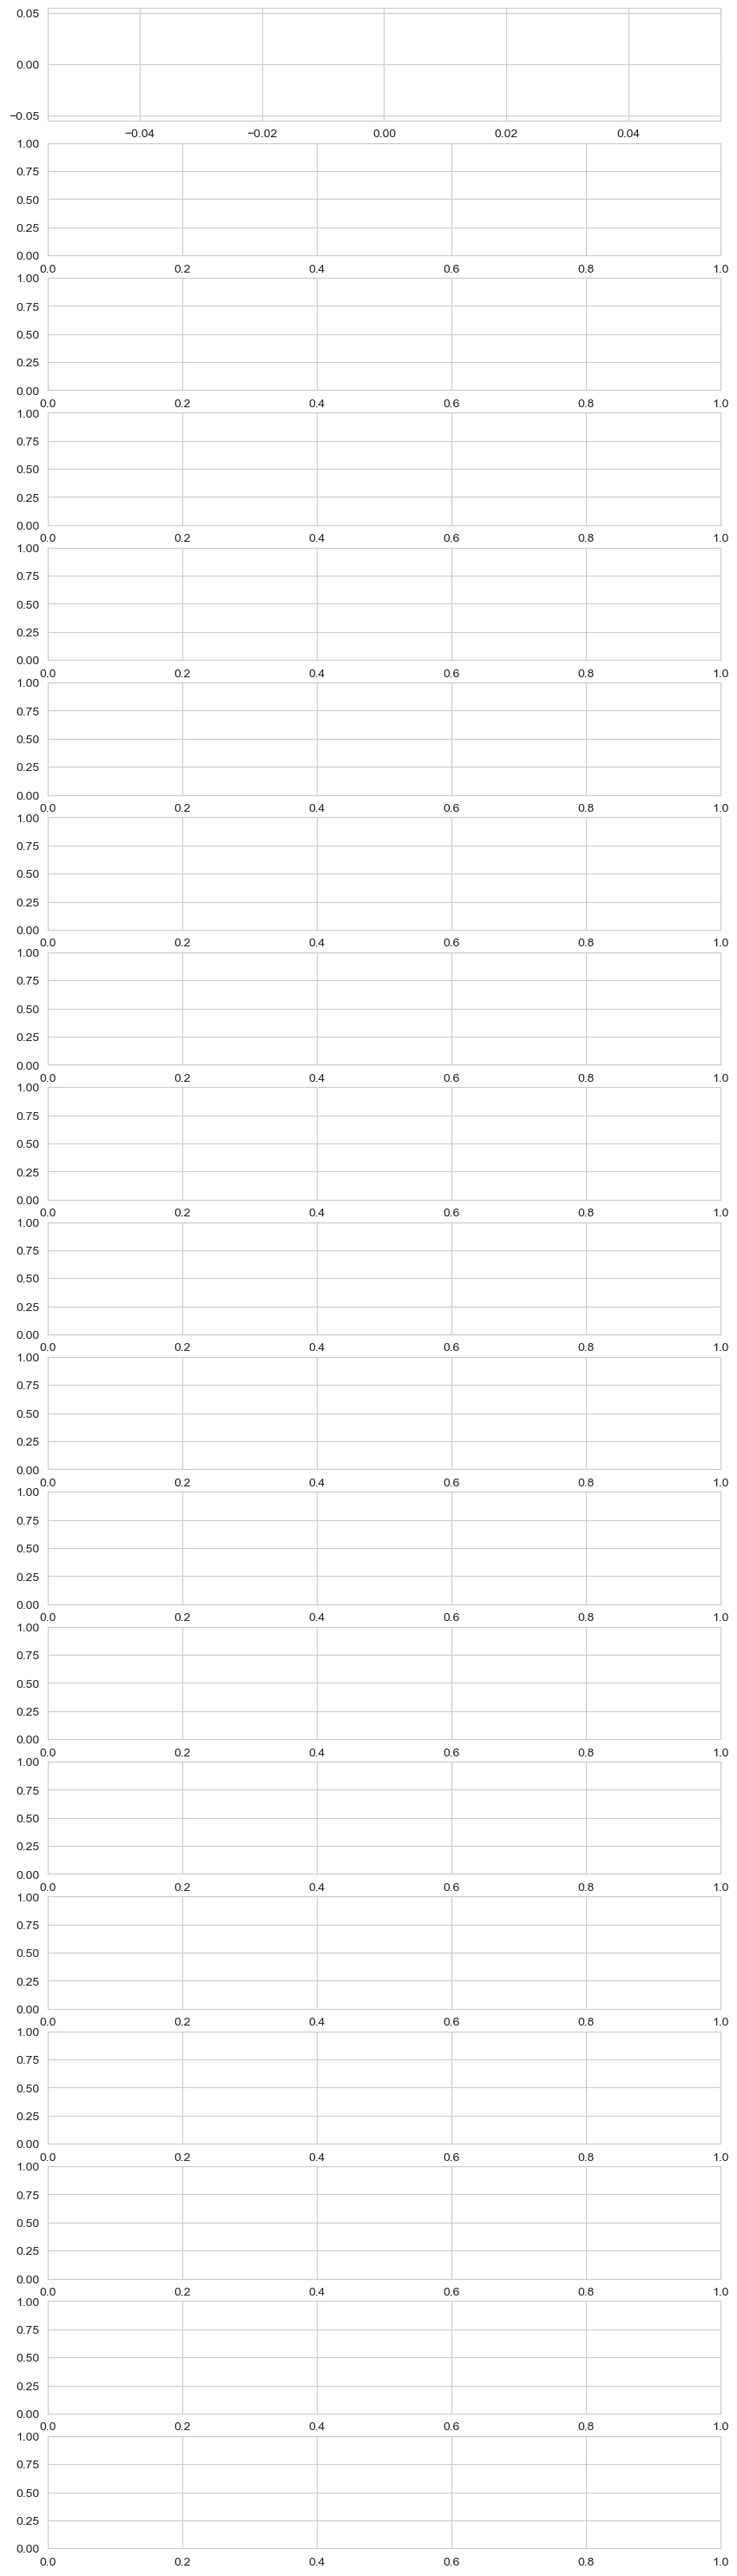

In [14]:
days = np.arange(3,22)
plot_licks_trend_with_linear_fit(df_all_mice, 'maxwell_452', days)
plot_licks_trend_with_linear_fit(df_all_mice, 'maxwell_453', days)
plot_licks_trend_with_linear_fit(df_all_mice, 'maxwell_454', days)

In [53]:
#integrate david's code 

In [17]:
import scipy

def plot_mouse_licking_dynamic(df_all_mice, days, mouse, block_lim=60, sigma=100, delay=5000, plot_height=3, shaping=True):
    """
    Plots the behavior of a mouse over given days with specified parameters, including an option
    to only plot rewarded trial types if shaping is True. Differentiates rewarded and non-rewarded
    trial types by color. Adjusts plot size for a nicer appearance.

    Parameters:
    - df_all_mice: DataFrame containing all the mice data.
    - days: List of days to plot.
    - mouse: The name of the mouse to plot.
    - block_lim: The upper limit of blocks to consider.
    - sigma: Sigma value for Gaussian filter.
    - delay: Delay before events occur in the plot.
    - plot_height: Height of the template plots.
    - shaping: If True, only plots the rewarded trial types.
    """
    sns.set_palette("Dark2")

    # Adjust figsize here
    figsize_width = max(8, len(days) * 4)  # Slightly wider for better aspect ratio
    figsize_height = max(4, len(days) * 2.5)  # Proportional height but not too tall
    plt.figure(figsize=(figsize_width, figsize_height))

    # Define colors for trial types
    rewarded_color = 'green'
    non_rewarded_color = 'red'

    for i, j in enumerate(days):
        temp_data = df_all_mice[(df_all_mice.day == j) & (df_all_mice.block < block_lim) & (df_all_mice.mouse == mouse)]
        plt.subplot(len(days), 1, 1+i)

        # Plotting templates
        water_template = np.zeros(delay+10000)
        water_template[delay+6500:delay+6650] = plot_height
        plt.fill_between(range(len(water_template)), water_template, color='lightblue', label='Water')
        odour_template = np.zeros(delay+10000)
        odour_template[3000:4000] = plot_height
        odour_template[delay+4000:delay+5000] = plot_height
        plt.fill_between(range(len(odour_template)), odour_template, color='0.8', label='Odour')
        go_nogo_template = np.zeros(delay+10000)
        go_nogo_template[delay+5500:delay+6450] = plot_height
        plt.fill_between(range(len(go_nogo_template)), go_nogo_template, color='lightyellow', label='Go/No-Go')

        if shaping:
            trial_types = ['c->a', 'a->b', 'b->c']
        else:
            trial_types = ['c->a', 'a->b', 'b->c', 'b->a', 'c->b', 'a->c']

        for trial_type in trial_types:
            filtered_data = scipy.ndimage.gaussian_filter1d(
                np.mean(temp_data[temp_data.trial_type == trial_type].lick_data.values.tolist(), axis=0), sigma)

            if trial_type in ['c->a', 'a->b', 'b->c']:
                color = rewarded_color
            else:
                color = non_rewarded_color

            sns.lineplot(x=range(len(filtered_data)), y=filtered_data, label=trial_type, color=color)

        plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Trial Types & Events')
        plt.xlim(0, 20000)
        plt.xlabel('Time')
        plt.ylabel('Lick Rate')
        plt.title(f'Mouse: {mouse} - Day: {j}')

    plt.tight_layout()  # Adjusts subplot params for a nicer layout


/var/folders/xc/fqjpc3c109d8130c9p4w179nnjty6s/T/ipykernel_80036/4110663102.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(figsize_width, figsize_height))


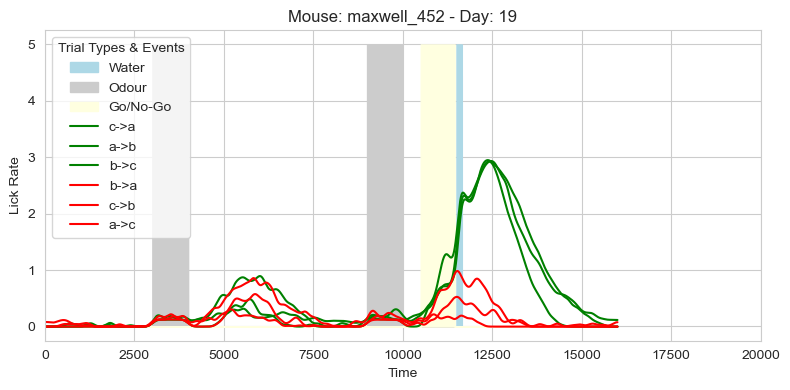

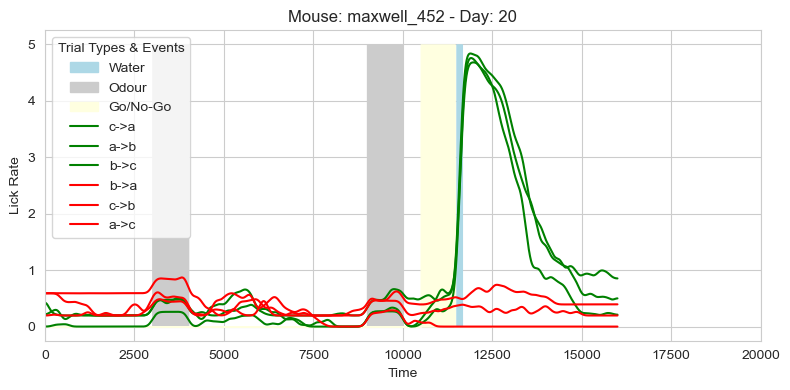

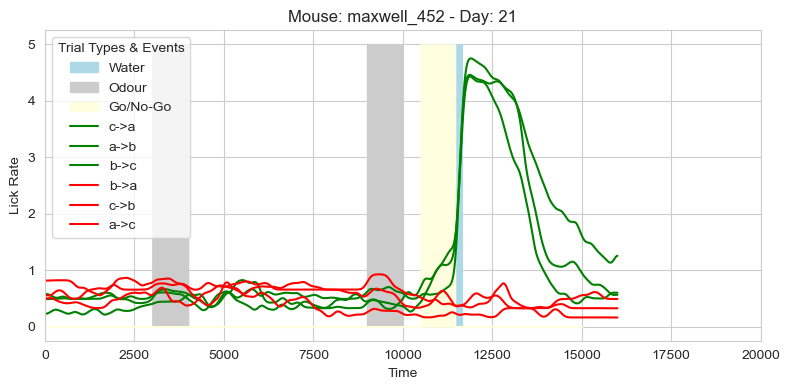

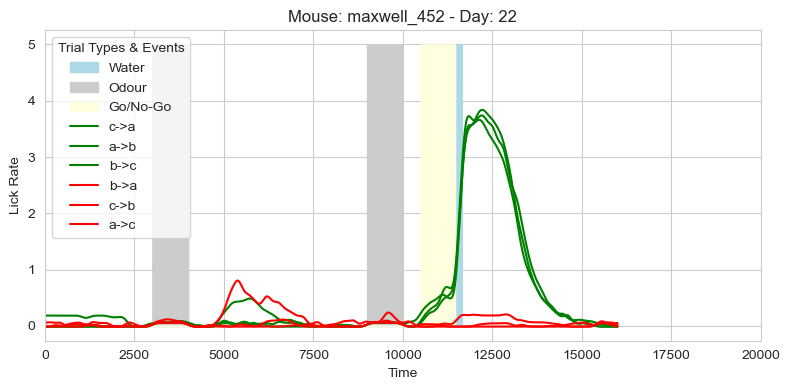

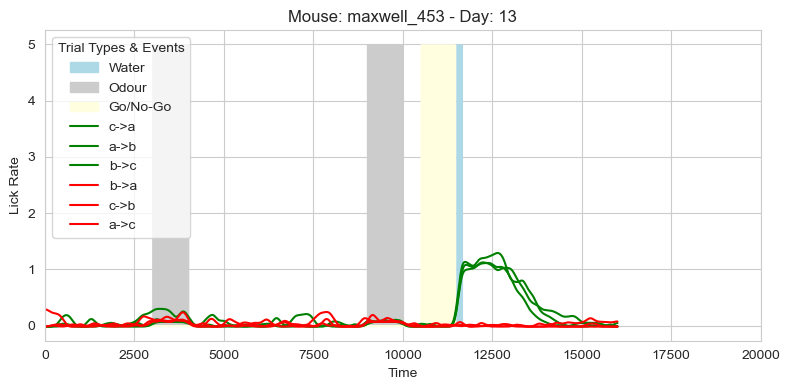

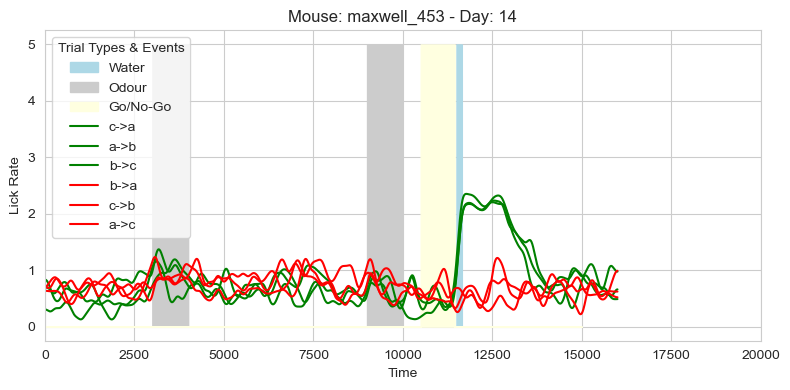

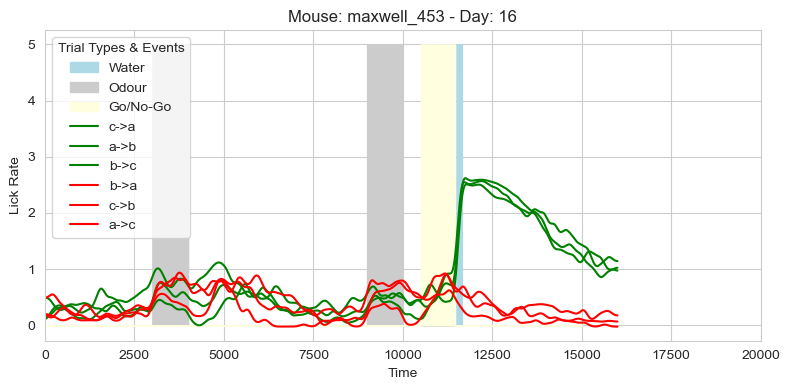

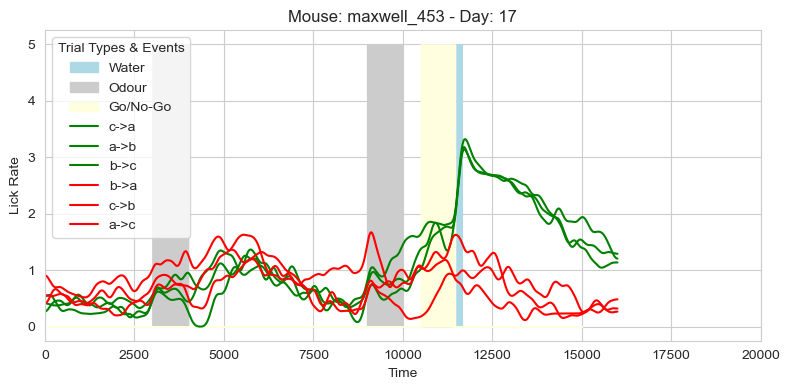

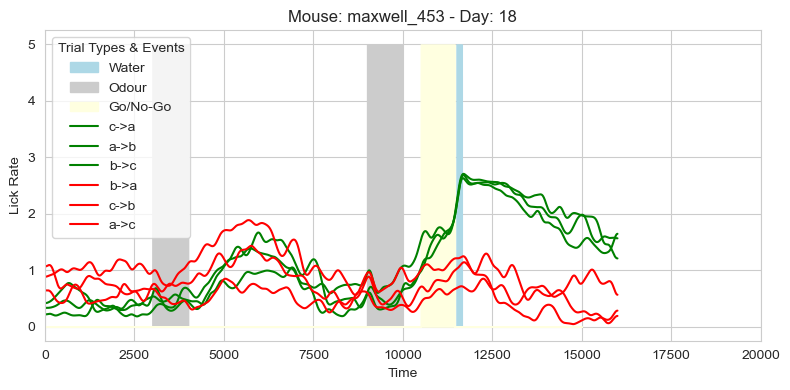

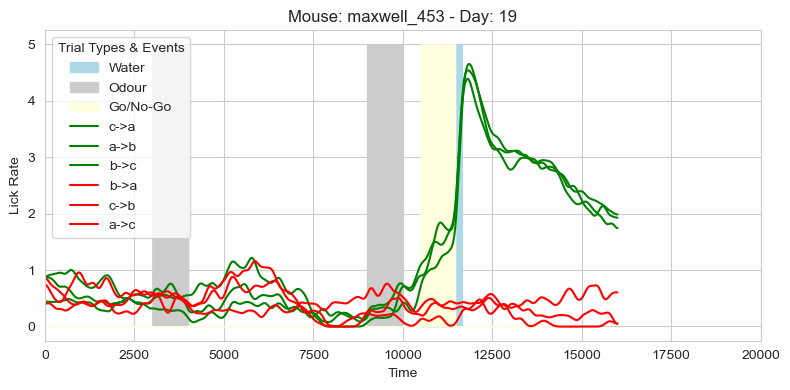

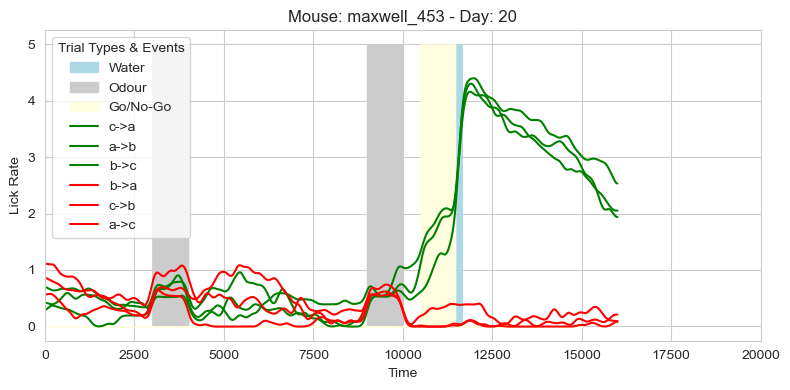

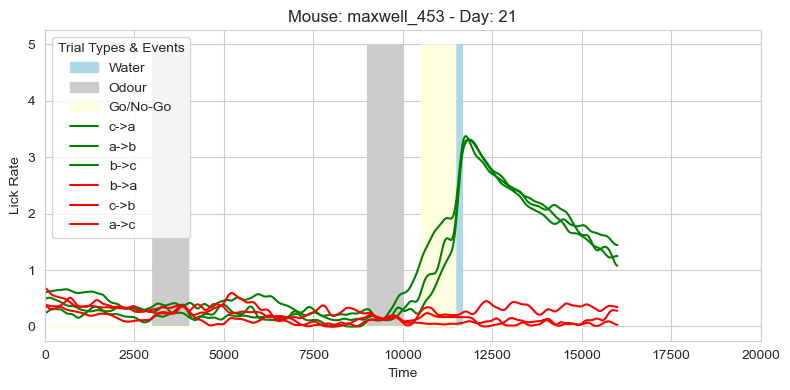

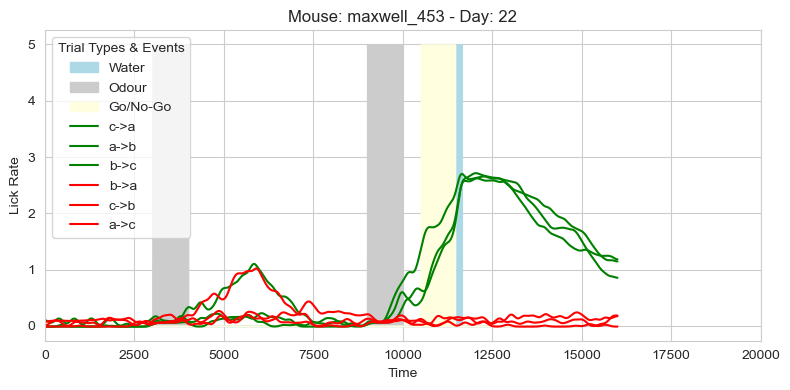

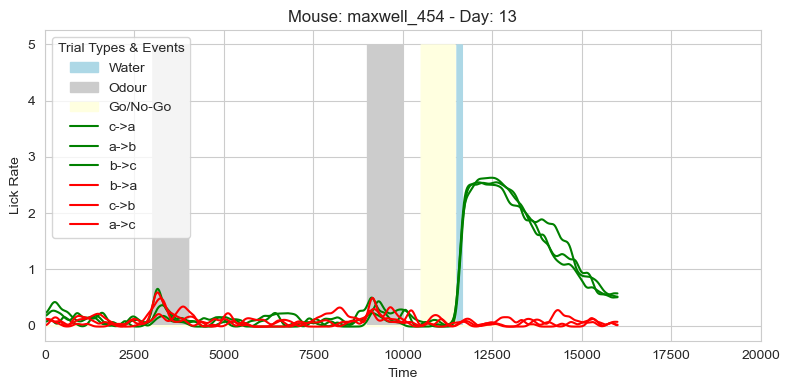

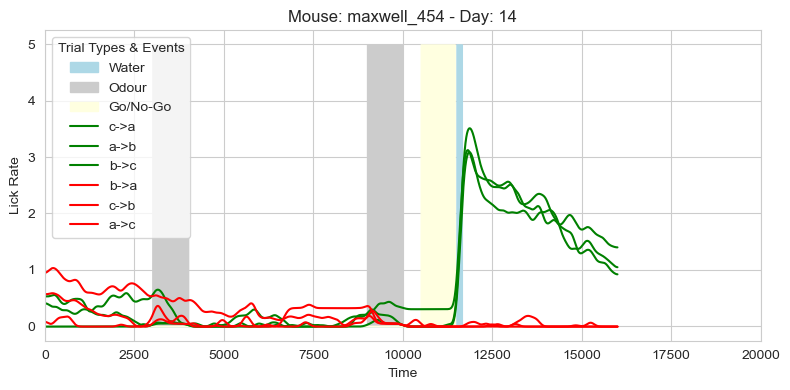

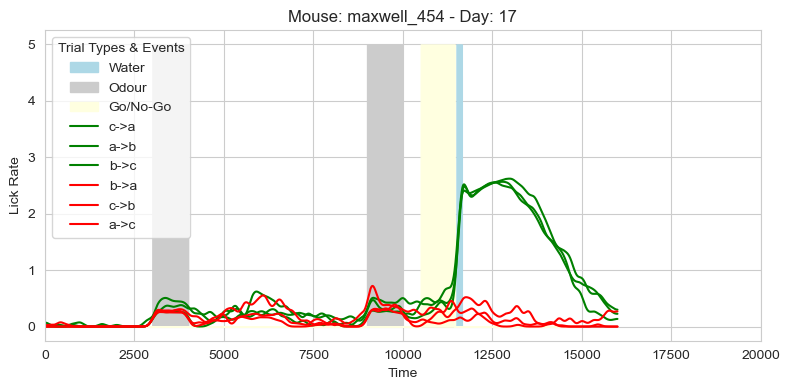

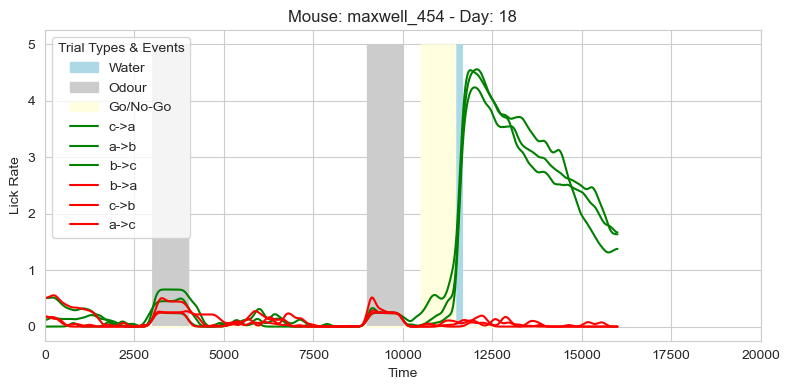

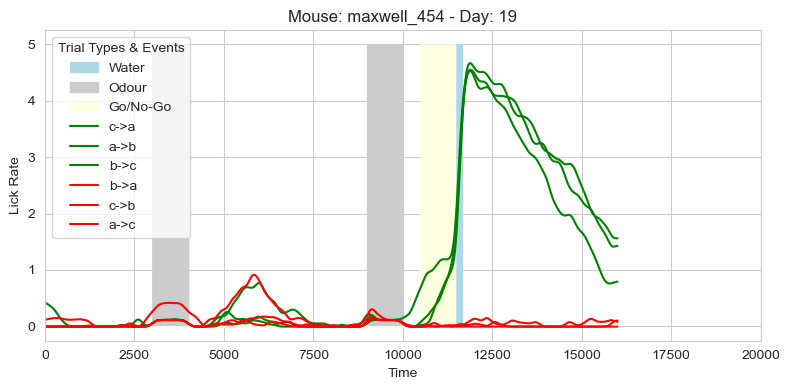

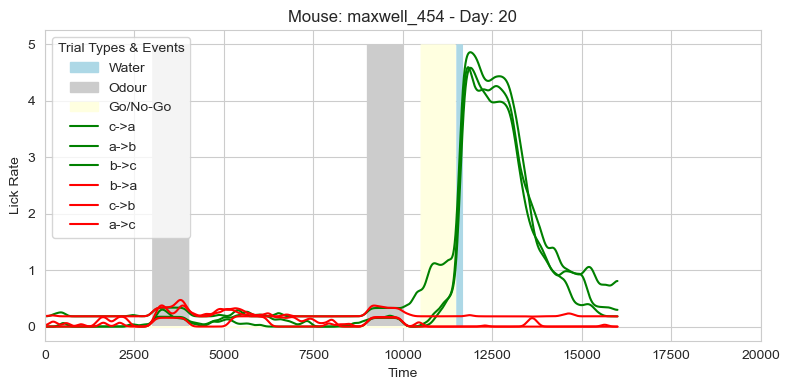

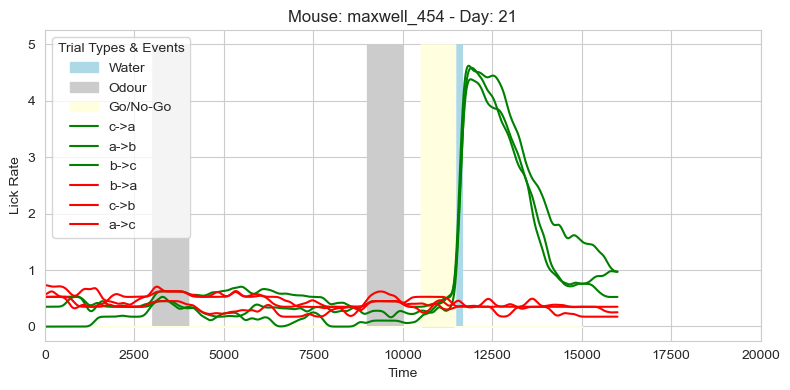

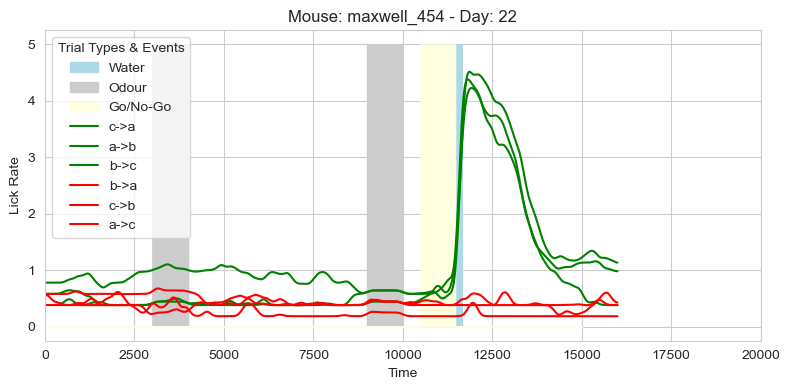

In [18]:
def plot_licking_dynamics_for_mouse(days_of_interest, mouse_id, df_all_mice, block_lim=60, sigma=100, delay=5000, plot_height=5, shaping=False):
    """
    Plot licking dynamics for a specific mouse across specified days.

    Args:
    - days_of_interest (dict): Dictionary mapping mouse IDs to lists of days of interest.
    - mouse_id (str): The ID of the mouse to plot.
    - df_all_mice (DataFrame): DataFrame containing all mice data.
    - block_lim (int): The limit for the block.
    - sigma (int): Sigma value for smoothing.
    - delay (int): Delay in milliseconds.
    - plot_height (int): The height of each plot.
    - shaping (bool): Whether shaping is applied.
    """
    # Check if the mouse_id is in the days_of_interest
    if mouse_id in days_of_interest:
        # Loop through each day for the specified mouse
        for day in days_of_interest[mouse_id]:
            # Call the plotting function for each day
            plot_mouse_licking_dynamic(df_all_mice, days=[day], mouse=mouse_id, block_lim=block_lim, sigma=sigma, delay=delay, plot_height=plot_height, shaping=shaping)
    else:
        print(f"No days of interest found for mouse {mouse_id}.")

# Example usage
mouse_id = 'maxwell_453'  # Specify the mouse ID
days_of_interest = {
    'maxwell_452': [19,20,21,22],
    'maxwell_453': [13,14,16,17,18,19,20,21,22],
    'maxwell_454': [13,14,17,18,19,20,21,22]
}
for mouse_id in days_of_interest.keys():
    plot_licking_dynamics_for_mouse(days_of_interest, mouse_id, df_all_mice)


In [121]:
days_of_interest.keys()

dict_keys(['maxwell_452', 'maxwell_453', 'maxwell_454'])